# Raw data to clean data conversion using python EDA

In [1]:
import pandas as pd

In [2]:
pd.__version__

'2.3.3'

In [3]:
emp  = pd.read_excel(r"C:\Users\Satyabrata Sahoo\Desktop\naresh it\EDA\Rawdata.xlsx")

In [4]:
emp

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience#$,34 years,Mumbai,5^00#0,2+
1,Teddy^,Testing,45' yr,Bangalore,10%%000,<3
2,Uma#r,Dataanalyst^^#,NaN,NaN,1$5%000,4> yrs
3,Jane,Ana^^lytics,NaN,Hyderbad,2000^0,NaN
4,Uttam*,Statistics,67-yr,NaN,30000-,5+ year
5,Kim,NLP,55yr,Delhi,6000^$0,10+


In [5]:
emp.isna()

,Name,Domain,Age,Location,Salary,Exp
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,True,True,False,False
3,False,False,True,False,False,True
4,False,False,False,True,False,False
5,False,False,False,False,False,False


In [6]:
emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      6 non-null      object
 1   Domain    6 non-null      object
 2   Age       4 non-null      object
 3   Location  4 non-null      object
 4   Salary    6 non-null      object
 5   Exp       5 non-null      object
dtypes: object(6)
memory usage: 420.0+ bytes


# Data cleansing

In [7]:
emp['Name']

0      Mike
1    Teddy^
2     Uma#r
3      Jane
4    Uttam*
5       Kim
Name: Name, dtype: object

In [8]:
emp['Name'] = emp['Name'].str.replace(r'\W','',regex = True)  #\w=non word character

In [9]:
emp['Name']

0     Mike
1    Teddy
2     Umar
3     Jane
4    Uttam
5      Kim
Name: Name, dtype: object

In [10]:
emp['Domain']

0     Datascience#$
1           Testing
2    Dataanalyst^^#
3       Ana^^lytics
4        Statistics
5               NLP
Name: Domain, dtype: object

In [11]:
emp['Domain'] = emp['Domain'].str.replace(r'\W', '',regex = True)

In [12]:
emp['Domain']

0    Datascience
1        Testing
2    Dataanalyst
3      Analytics
4     Statistics
5            NLP
Name: Domain, dtype: object

In [13]:
emp['Age'] = emp['Age'].str.replace(r'\W', '',regex = True)

In [14]:
emp['Age']

0    34years
1       45yr
2        NaN
3        NaN
4       67yr
5       55yr
Name: Age, dtype: object

In [15]:
emp

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34years,Mumbai,5^00#0,2+
1,Teddy,Testing,45yr,Bangalore,10%%000,<3
2,Umar,Dataanalyst,NaN,NaN,1$5%000,4> yrs
3,Jane,Analytics,NaN,Hyderbad,2000^0,NaN
4,Uttam,Statistics,67yr,NaN,30000-,5+ year
5,Kim,NLP,55yr,Delhi,6000^$0,10+


In [16]:
emp['Age'] = emp['Age'].str.extract('(\\d+)')

In [17]:
emp['Age']

0     34
1     45
2    NaN
3    NaN
4     67
5     55
Name: Age, dtype: object

In [18]:
emp['Location'] = emp['Location'].str.replace(r'\W', '',regex = True)

In [19]:
emp['Location']

0       Mumbai
1    Bangalore
2          NaN
3     Hyderbad
4          NaN
5        Delhi
Name: Location, dtype: object

In [20]:
emp['Salary'] = emp['Salary'].str.replace(r'\W', '',regex = True)

In [21]:
emp['Salary']

0     5000
1    10000
2    15000
3    20000
4    30000
5    60000
Name: Salary, dtype: object

In [22]:
emp.head()

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2+
1,Teddy,Testing,45,Bangalore,10000,<3
2,Umar,Dataanalyst,NaN,NaN,15000,4> yrs
3,Jane,Analytics,NaN,Hyderbad,20000,NaN
4,Uttam,Statistics,67,NaN,30000,5+ year


In [23]:
emp['Exp'] = emp['Exp'].str.extract('(\\d+)')

In [24]:
emp['Exp']

0      2
1      3
2      4
3    NaN
4      5
5     10
Name: Exp, dtype: object

In [25]:
clean_data = emp.copy()

In [26]:
clean_data

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,NaN,NaN,15000,4
3,Jane,Analytics,NaN,Hyderbad,20000,NaN
4,Uttam,Statistics,67,NaN,30000,5
5,Kim,NLP,55,Delhi,60000,10


# EDA Technique Apply

# Missing values Treatment

In [27]:
clean_data

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,NaN,NaN,15000,4
3,Jane,Analytics,NaN,Hyderbad,20000,NaN
4,Uttam,Statistics,67,NaN,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [28]:
clean_data.isnull().sum() # to check the null value

Name        0
Domain      0
Age         2
Location    2
Salary      0
Exp         1
dtype: int64

In [29]:
clean_data['Age']

0     34
1     45
2    NaN
3    NaN
4     67
5     55
Name: Age, dtype: object

In [30]:
import numpy as np

In [31]:
clean_data['Age'] = clean_data['Age'].fillna(np.mean(pd.to_numeric(clean_data['Age'])))   #numerical data

In [32]:
clean_data['Age']

0       34
1       45
2    50.25
3    50.25
4       67
5       55
Name: Age, dtype: object

In [33]:
clean_data['Exp'] = clean_data['Exp'].fillna(np.mean(pd.to_numeric(clean_data['Exp'])))

In [34]:
clean_data['Exp']

0      2
1      3
2      4
3    4.8
4      5
5     10
Name: Exp, dtype: object

In [35]:
clean_data

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,50.25,NaN,15000,4
3,Jane,Analytics,50.25,Hyderbad,20000,4.8
4,Uttam,Statistics,67,NaN,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [36]:
clean_data['Location']

0       Mumbai
1    Bangalore
2          NaN
3     Hyderbad
4          NaN
5        Delhi
Name: Location, dtype: object

In [37]:
clean_data['Location'] = clean_data['Location'].fillna(clean_data['Location'].mode()[0]) # categorical data


In [38]:
clean_data['Location']

0       Mumbai
1    Bangalore
2    Bangalore
3     Hyderbad
4    Bangalore
5        Delhi
Name: Location, dtype: object

In [39]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      6 non-null      object
 1   Domain    6 non-null      object
 2   Age       6 non-null      object
 3   Location  6 non-null      object
 4   Salary    6 non-null      object
 5   Exp       6 non-null      object
dtypes: object(6)
memory usage: 420.0+ bytes


In [40]:
clean_data['Salary'] = clean_data['Salary'].astype(int) # convert datatype to 

In [41]:
clean_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      6 non-null      object
 1   Domain    6 non-null      object
 2   Age       6 non-null      object
 3   Location  6 non-null      object
 4   Salary    6 non-null      int64 
 5   Exp       6 non-null      object
dtypes: int64(1), object(5)
memory usage: 420.0+ bytes


In [42]:
clean_data['Exp'] = clean_data['Exp'].astype(int)

In [43]:
clean_data['Exp']

0     2
1     3
2     4
3     4
4     5
5    10
Name: Exp, dtype: int64

In [44]:
clean_data['Name'] = clean_data['Name'].astype('category')
clean_data['Domain'] = clean_data['Domain'].astype('category')
clean_data['Location'] = clean_data['Location'].astype('category')

In [45]:
clean_data

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,50.25,Bangalore,15000,4
3,Jane,Analytics,50.25,Hyderbad,20000,4
4,Uttam,Statistics,67,Bangalore,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [46]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Name      6 non-null      category
 1   Domain    6 non-null      category
 2   Age       6 non-null      object  
 3   Location  6 non-null      category
 4   Salary    6 non-null      int64   
 5   Exp       6 non-null      int64   
dtypes: category(3), int64(2), object(1)
memory usage: 938.0+ bytes


In [47]:
clean_data['Age'] = clean_data['Age'].astype(int)

In [48]:
clean_data['Age']

0    34
1    45
2    50
3    50
4    67
5    55
Name: Age, dtype: int64

In [49]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Name      6 non-null      category
 1   Domain    6 non-null      category
 2   Age       6 non-null      int64   
 3   Location  6 non-null      category
 4   Salary    6 non-null      int64   
 5   Exp       6 non-null      int64   
dtypes: category(3), int64(3)
memory usage: 938.0 bytes


In [50]:
clean_data.to_csv('clean_data.csv')  # to save the data on pc

In [51]:
import os
os.getcwd()

'C:\\Users\\Satyabrata Sahoo'

 # Lets apply EDA Technique

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
import warnings
warnings.filterwarnings('ignore')

In [54]:
clean_data['Salary']

0     5000
1    10000
2    15000
3    20000
4    30000
5    60000
Name: Salary, dtype: int64

# univariate analysis

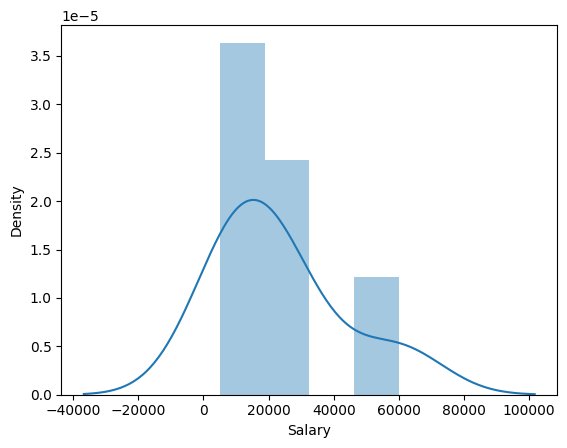

In [55]:
vis1 = sns.distplot(clean_data['Salary'])  
plt.show()

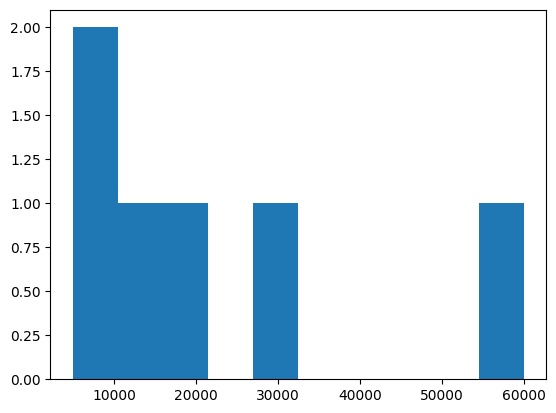

In [56]:
vis2 = plt.hist(clean_data['Salary'])

In [57]:
clean_data

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,50,Bangalore,15000,4
3,Jane,Analytics,50,Hyderbad,20000,4
4,Uttam,Statistics,67,Bangalore,30000,5
5,Kim,NLP,55,Delhi,60000,10


# Bivaritae analysis

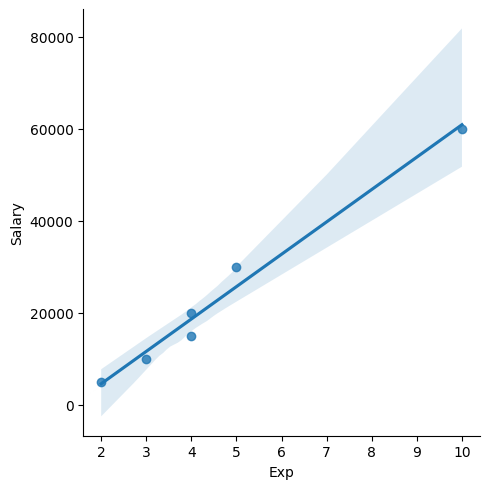

In [73]:
vis4 = sns.lmplot(data=clean_data, x='Exp', y='Salary') 

# Outlier Treatment

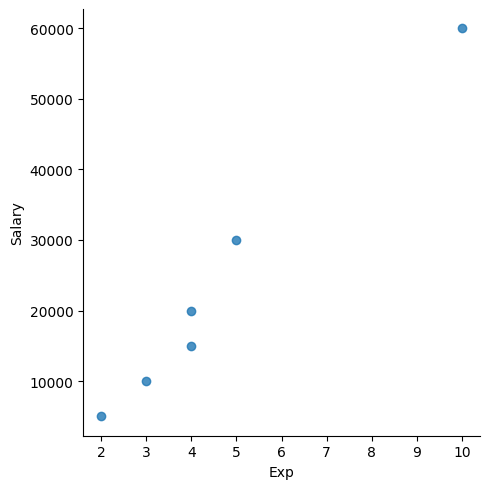

In [74]:
vis5 = sns.lmplot(data=clean_data, x='Exp', y='Salary',fit_reg = False) 

In [60]:
clean_data.columns

Index(['Name', 'Domain', 'Age', 'Location', 'Salary', 'Exp'], dtype='object')

In [61]:
clean_data

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,50,Bangalore,15000,4
3,Jane,Analytics,50,Hyderbad,20000,4
4,Uttam,Statistics,67,Bangalore,30000,5
5,Kim,NLP,55,Delhi,60000,10


# split Variable

# Independent variable

In [75]:
x_iv = clean_data[['Name', 'Domain', 'Age', 'Location', 'Exp']] 

In [63]:
x_iv

,Name,Domain,Age,Location,Exp
0,Mike,Datascience,34,Mumbai,2
1,Teddy,Testing,45,Bangalore,3
2,Umar,Dataanalyst,50,Bangalore,4
3,Jane,Analytics,50,Hyderbad,4
4,Uttam,Statistics,67,Bangalore,5
5,Kim,NLP,55,Delhi,10


# Dependent variable

In [64]:
y_dv = clean_data['Salary'] 

In [65]:
y_dv 

0     5000
1    10000
2    15000
3    20000
4    30000
5    60000
Name: Salary, dtype: int64

# Imputation

In [66]:
imputation = pd.get_dummies(clean_data)

In [67]:
imputation

,Age,Salary,Exp,Name_Jane,Name_Kim,Name_Mike,Name_Teddy,Name_Umar,Name_Uttam,Domain_Analytics,Domain_Dataanalyst,Domain_Datascience,Domain_NLP,Domain_Statistics,Domain_Testing,Location_Bangalore,Location_Delhi,Location_Hyderbad,Location_Mumbai
0,34,5000,2,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True
1,45,10000,3,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False
2,50,15000,4,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False
3,50,20000,4,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False
4,67,30000,5,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False
5,55,60000,10,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False


In [68]:
imputation = pd.get_dummies(clean_data,dtype=int) # transformer

In [69]:
imputation 

,Age,Salary,Exp,Name_Jane,Name_Kim,Name_Mike,Name_Teddy,Name_Umar,Name_Uttam,Domain_Analytics,Domain_Dataanalyst,Domain_Datascience,Domain_NLP,Domain_Statistics,Domain_Testing,Location_Bangalore,Location_Delhi,Location_Hyderbad,Location_Mumbai
0,34,5000,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
1,45,10000,3,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0
2,50,15000,4,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
3,50,20000,4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,67,30000,5,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
5,55,60000,10,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [70]:
len(clean_data)

6

In [71]:
imputation.columns

Index(['Age', 'Salary', 'Exp', 'Name_Jane', 'Name_Kim', 'Name_Mike',
       'Name_Teddy', 'Name_Umar', 'Name_Uttam', 'Domain_Analytics',
       'Domain_Dataanalyst', 'Domain_Datascience', 'Domain_NLP',
       'Domain_Statistics', 'Domain_Testing', 'Location_Bangalore',
       'Location_Delhi', 'Location_Hyderbad', 'Location_Mumbai'],
      dtype='object')

In [72]:
len(imputation.columns)

19